In [106]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import seaborn as sns

In [107]:
Ainit = 1e-8
kon = 1e5
rho = 1
k = kon*Ainit*rho
rtot = 1e5
Target_cell_number = 5e3
Atot = 1e16*Ainit/Target_cell_number
koff = 1e-4
delta = 4

In [108]:
beta = Atot/rtot
print(beta)

0.2


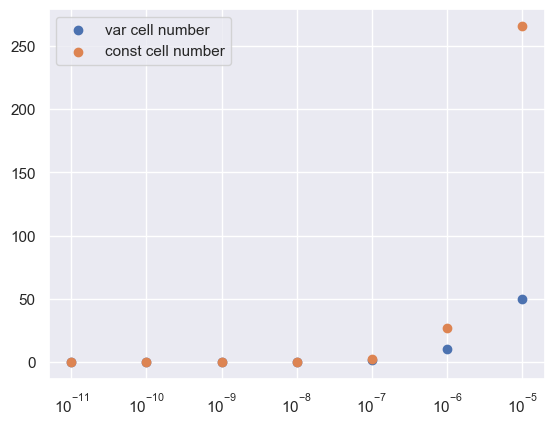

In [109]:
# different beta plots repfeclting different assumptions/assay conditions

concentrations = [1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
varying_cell_number_betas = [0.003, 0.016, 0.08, 0.4, 2, 10, 50]

def beta_const_cell_number(conc):
    return (0.12/(150000*6.0221408e-23))*conc*(1/(rtot*Target_cell_number))

const_cell_betas = []
for const in concentrations:
    const_cell_betas.append(beta_const_cell_number(const))

sns.set_theme()
plt.scatter(concentrations, varying_cell_number_betas, label='var cell number')
plt.scatter(concentrations, const_cell_betas, label = 'const cell number')
plt.xscale('log')
plt.legend(loc='best')
plt.show()

In [110]:
for i in range(len(varying_cell_number_betas)):
    print(abs(varying_cell_number_betas[i]- const_cell_betas[i]))

0.0027343137510169144
0.013343137510169141
0.053431375101691415
0.13431375101691417
0.6568624898308584
16.568624898308585
215.68624898308587


In [111]:
print('constant cell beta = ', const_cell_betas )

constant cell beta =  [0.00026568624898308583, 0.002656862489830859, 0.026568624898308586, 0.26568624898308585, 2.6568624898308584, 26.568624898308585, 265.6862489830859]


In [112]:
def model(t, z):
    dA1 = (2/rtot)*k*(rtot-z[0]-2*z[1])*(Atot-z[0]-z[1]) - koff*z[0] - (delta/rtot)*k*(rtot-z[0]-2*z[1])*z[0] + 2*koff*z[1]
    dA2 = (delta/rtot)*k*(rtot-z[0]-2*z[1])*z[0] - 2*koff*z[1]

    return [dA1, dA2]

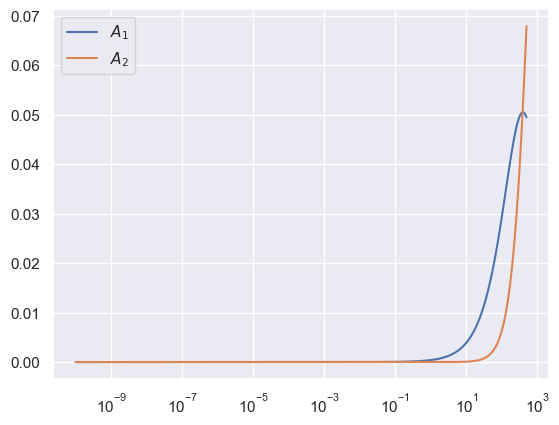

In [113]:
t_end = 1000/2
t = np.geomspace(1e-10, t_end, 5000)
tspan = [1e-10, t_end]
z0 = [0, 0]

z = solve_ivp(model, tspan, z0, method='Radau', t_eval=t)

A1 = z.y[0]/rtot
A2 = z.y[1]/rtot
A0 = (Atot - z.y[0] - z.y[1])/Atot

sns.set_theme()
#plt.plot(t, A0, label = r'$A_0$')
plt.plot(t, A1, label = r'$A_1$')
plt.plot(t, A2, label = r'$A_2$')
plt.xscale('log')
plt.legend(loc='best')
plt.show()

Dimensionless model

In [114]:
Ainit = 1e-11
kon = 1e5
rho = 1
k = kon*Ainit*rho
koff = 1e-4
alpha = k/koff
Target_cell_number = 5e3
Atot = 1e16*Ainit/Target_cell_number
beta = Atot/rtot
delta = 4
print(beta)

t_end = 10
t = np.geomspace(1e-10, t_end, 5000)
tspan = [1e-10, t_end]
z0 = [0, 0]

0.0002


In [115]:
def dimensionless_model(t, z):
    dA1 = 2*alpha*(1-z[0]-2*z[1])*(beta-z[0]-z[1]) - z[0] - delta*alpha*(1-z[0]-2*z[1])*z[0] + 2*z[1]
    dA2 = delta*alpha*(1-z[0]-2*z[1])*z[0] - 2*z[1]

    return [dA1, dA2]

In [116]:
def dimensionless_surplus_model(t, z):
    dA1 = 2*alpha*(1-z[0]-2*z[1])*beta - z[0] - delta*alpha*(1-z[0]-2*z[1])*z[0] + 2*z[1]
    dA2 = delta*alpha*(1-z[0]-2*z[1])*z[0] - 2*z[1]

    return [dA1, dA2]

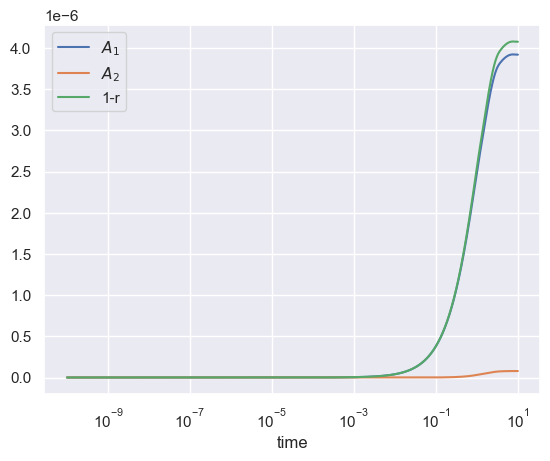

In [117]:
z = solve_ivp(dimensionless_model, tspan, z0, method='Radau', t_eval=t)

A1 = z.y[0]
A2 = z.y[1]
A0 = 1 - (1/beta)*A1 - (1/beta)*A2

A10 = (2/(2*beta + alpha))*(1 - np.exp(-(2*beta + alpha)*t))
r = 1 - (1 - A1 - 2*A2)
sns.set_theme()
#plt.plot(t, A0, label = r'$A_0$')
plt.plot(t, A1, label = r'$A_1$')
plt.plot(t, A2, label = r'$A_2$')
plt.plot(t, r, label = '1-r')
#plt.plot(t, A10)
plt.xlabel('time')
plt.xscale('log')
plt.legend(loc='best')
plt.show()

Phase Plane

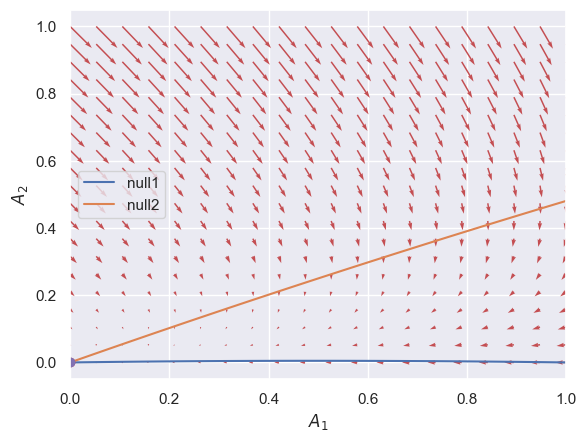

In [118]:
y1 = np.linspace(0, 1, 20)
y2 = np.linspace(0, 1, 20)

Y1, Y2 = np.meshgrid(y1, y2)

t = 0

A1, A2 = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = dimensionless_model(t, [x, y])
        A1[i, j] = yprime[0]
        A2[i, j] = yprime[1]

def null1(x):

    return (delta*alpha*(1-x)*x)/(2*(1+delta*alpha*x))

def null2(x):
    return (2*alpha*beta*(1-x) - x - delta*alpha*(1-x)*x)/(2*(2*alpha*beta - 1 - delta*alpha*x))

def A1root(x):

    return 0.5*(1-2*x + ((2*x - 1)**2 - (8/(delta*alpha))*x)**(0.5))

def A1root1(x):

    return ((2*delta*alpha*x - 2*alpha*beta - 1 - delta*alpha) + (((2*alpha*beta + 1 + delta*alpha - 2*delta*alpha*x)**2 - 4*delta*alpha*(4*alpha*beta*x - 2*alpha*beta - 2*x))**(0.5)))/(2*delta*alpha)


A1s = np.linspace(0, 1, 100)

plt.plot(A1s, null1(A1s), label = 'null1')
plt.plot(A1s, null2(A1s), label = 'null2')
#plt.plot(A1root(A1s), A1s, label = 'A1 root')
#plt.plot(A1root1(A1s), A1s, label = 'A1 root 1')
plt.legend()
plt.xlim([0, 1])

Q = plt.quiver(Y1, Y2, A1, A2, color='r')
z1 = z.y[0]
z2 = z.y[1]
plt.plot(z1, z2, '--')
plt.plot([z1[0]], [z2[0]], 'o')
plt.plot([z1[-1]], [z2[-1]], 'o')
#plt.xlim(0, 0.1)
#plt.ylim(0, 0.2)
plt.xlabel(r'$A_1$')
plt.ylabel(r'$A_2$')
plt.show()
        